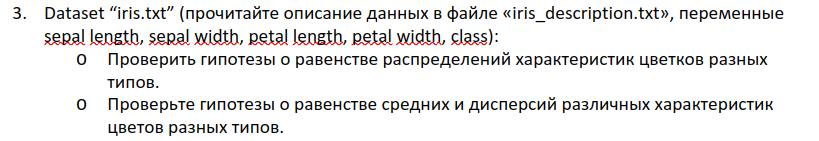

In [7]:
import pandas as pd
import scipy.stats as st

cols = ['s_length', 's_width', 'p_length', 'p_width', 'clas']
df = pd.read_csv('datasets/iris.txt', sep=',', header=None, names=cols)

df.head()


,s_length,s_width,p_length,p_width,clas
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.clas.value_counts()

clas
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
df1 = df.loc[(df['clas'] == 'Iris-setosa')]
df2 = df.loc[(df['clas'] == 'Iris-versicolor')]
df3 = df.loc[(df['clas'] == 'Iris-virginica')]

dfs = [df1, df2, df3]
titles = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

### Проверка гипотез о рав-ве распределений характеристик цветков разных типов

##### Критерий Краскела-Уоллиса
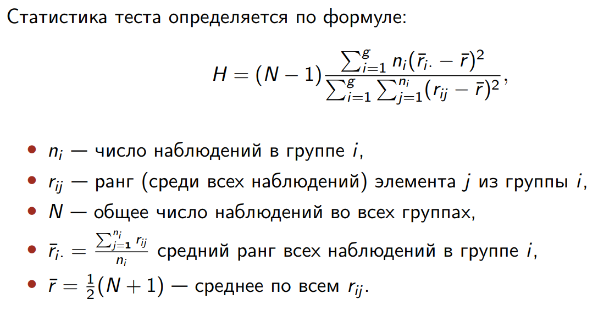

In [10]:
def get_kruskal(p):
    return st.kruskal(df1[cols[p]], df2[cols[p]], df3[cols[p]])

for i in range(len(cols)-1):
    print(cols[i])
    print(get_kruskal(i))
    print()

s_length
KruskalResult(statistic=96.93743600064833, pvalue=8.91873433246198e-22)

s_width
KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

p_length
KruskalResult(statistic=130.41406912893967, pvalue=4.7967237479455454e-29)

p_width
KruskalResult(statistic=131.09335318823713, pvalue=3.415387999117524e-29)



гипотезы не подтвердились

### Проверка гипотез о рав-ве средних и дисперсий характеристик цветков разных типов

In [11]:
# среднее
def get_f_oneway(p):
    return st.f_oneway(df1[cols[p]], df2[cols[p]], df3[cols[p]])

# дисперсия
def get_bartlett(p):
    return st.bartlett(df1[cols[p]], df2[cols[p]], df3[cols[p]])

for i in range(len(cols)-1):
    print(cols[i])
    print("Средние   ", get_f_oneway(i))
    print("Дисперсия ", get_bartlett(i))
    print()

s_length
Средние    F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)
Дисперсия  BartlettResult(statistic=16.005701874401502, pvalue=0.0003345076070163035)

s_width
Средние    F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)
Дисперсия  BartlettResult(statistic=2.2158125491551637, pvalue=0.3302496898960959)

p_length
Средние    F_onewayResult(statistic=1179.0343277002194, pvalue=3.0519758018278374e-91)
Дисперсия  BartlettResult(statistic=55.49409813024258, pvalue=8.904503355816222e-13)

p_width
Средние    F_onewayResult(statistic=959.3244057257613, pvalue=4.376956957488959e-85)
Дисперсия  BartlettResult(statistic=37.99553767573184, pvalue=5.61531114076804e-09)



Все гипотезы о рав-ве отвергаем, кроме s_width о рав-ве дисперсии